In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
data = pd.read_csv('/content/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [69]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [70]:
# Getting details of feature p class
print('Unique values for class: ', data['Pclass'].unique())
print('\nPassenger counts in all classes\n{}'.format(data['Pclass'].value_counts()))

Unique values for class:  [3 2 1]

Passenger counts in all classes
3    218
1    107
2     93
Name: Pclass, dtype: int64


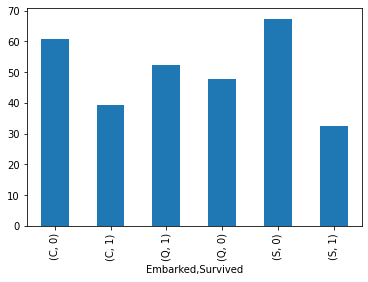

In [71]:
# Finding the survival rate on basis of embarked
data.groupby(['Embarked'])['Survived'].value_counts(normalize=True).mul(100).plot(kind='bar')

In [72]:
# The count of childrens the passengers have
data['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [73]:
# Name, PassengerId and Ticket is not effecting the target
# Cabin feature has too many nan values
# So, we drop these features

data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [74]:
print('Missing values in features\n{}'.format(data.isna().any(axis=0)))

# Filling all the missing values in age with it's mean
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

Missing values in features
Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool


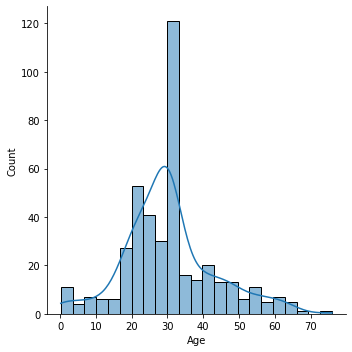

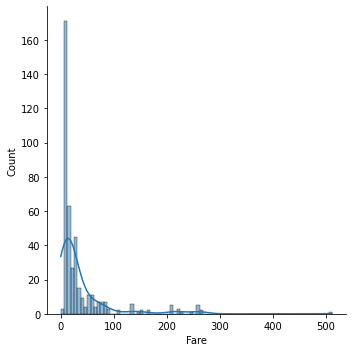

In [75]:
# Distribution of Fare and Age feature
sns.displot(data=data, x='Age', kde=True)
sns.displot(data=data, x='Fare', kde=True)

In [76]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# Converting the Fare and Age feature to stand normal distibution
age_Arr = np.array(data['Age'])
data['Age'] = scalar.fit_transform(age_Arr.reshape(-1, 1))

fare_Arr = np.array(data['Fare'])
data['Fare'] = scalar.fit_transform(fare_Arr.reshape(-1, 1))

In [77]:
# Convert categorical data into dummy
dummies = pd.get_dummies(data['Sex'])
data = pd.concat([data, dummies], axis = 'columns')
data.drop(['Sex'], axis=1, inplace=True)

emabarked_dum = pd.get_dummies(data['Embarked'])
data = pd.concat([data, emabarked_dum], axis=1)
data.drop(['Embarked'], axis=1, inplace=True)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,0.334993,0,0,-0.498407,0,1,0,1,0
1,1,3,1.325530,1,0,-0.513274,1,0,0,0,1
2,0,2,2.514175,0,0,-0.465088,0,1,0,1,0
3,0,3,-0.259330,0,0,-0.483466,0,1,0,0,1
4,1,3,-0.655545,1,1,-0.418471,1,0,0,0,1


In [78]:
x_data = data.drop(['Survived'], axis=1)
y_data = data['Survived']

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [80]:
x_train['Fare'] = x_train['Fare'].fillna(x_train['Fare'].mean())

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [83]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
print('Accuracy score of our model : ', accuracy_score(y_test, y_pred))

Accuracy score of our model :  1.0
